## Data Mining Topic Classification with k-NN, Naive Bayes, and Decision Trees

Introduction:

Welcome to this Jupyter Notebook where we delve into the fascinating world of data mining to tackle the challenge of topic classification. In the era of information overload, the ability to categorize and understand diverse textual content is crucial. In this notebook, we explore three powerful algorithms—k-Nearest Neighbors (k-NN), Naive Bayes, and Decision Trees—to classify topics within a dataset.

Objective:
The primary objective of this analysis is to showcase the effectiveness of different classification techniques in assigning topics to unstructured textual data. Each algorithm brings its unique approach to the table, making it an exciting journey to compare their performances.

Methods:

k-NN (k-Nearest Neighbors): We start with the intuitive k-NN algorithm, leveraging the concept of proximity to classify topics based on the similarity of their features.

Naive Bayes: Next, we explore the probabilistic world of Naive Bayes, a classifier based on Bayes' theorem, which assumes independence among features for simplicity and efficiency.

Decision Trees: Finally, we delve into Decision Trees, where we construct a tree-like model to navigate through the dataset, making decisions at each node based on feature conditions.


# IMPORT LIBRARIES

In [53]:
import pandas as pd                                          # For dataframes
import matplotlib.pyplot as plt                              # For plotting data
import seaborn as sns                                        # For plotting data
from sklearn.model_selection import train_test_split         # For train/test splits
from sklearn.model_selection import GridSearchCV             # For parameter optimization
from sklearn.neighbors import KNeighborsClassifier           # For kNN classification
from sklearn.naive_bayes import GaussianNB                   # For naive Bayes classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree   # For decision trees



# LOAD AND PREPARE DATA
Many of the datasets for this course come from the Machine Learning Repository at the University of California, Irvine (UCI) at [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/).

For all the three demonstrations of clustering techniques, we'll use the `Spambase Data Set`, which can be accessed via [https://archive.ics.uci.edu/ml/datasets/Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase). We'll use the dataset saved in the file `spambase.data`.

This data can be downloaded as a `CSV` file without the variable names using `pd.read_csv`. You'll need to manually add the `.csv` extension. This code saves the file in the data folder of our Python directory.

## Import Data

- To read read the dataset from a local CSV file, run the following cell. (This is the recommended approach.)

In [5]:
df = pd.read_csv('/content/spambase.csv', header=None)

- Alternatively, to read the data from the UCI ML Repository, uncomment the lines in the cell below and run them.

- Look at the data.

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
1,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.7560000000000002,61,278,1
2,0.21,0.28,0.5,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.37200000000000005,0.18,0.048,5.114,101,1028,1
3,0.06,0.0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.14300000000000002,0.0,0.276,0.184,0.01,9.821,485,2259,1
4,0.0,0.0,0.0,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.13699999999999998,0.0,0.13699999999999998,0.0,0.0,3.537,40,191,1


## Rename Variables

- Assign a name to all attributes as `X0`, `X1`, ..., `X56`.
- Assign `y` to the class variable (the last column of df).
- Display the first 5 rows.

In [7]:
# Sequentially renames all attribute columns and renames the last column to 'y'
df.columns = ['X' + str(i) for i in range(0, len(df.columns) - 1)] + ['y']

# Shows the first few lines of the data
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
1,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.7560000000000002,61,278,1
2,0.21,0.28,0.5,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.37200000000000005,0.18,0.048,5.114,101,1028,1
3,0.06,0.0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.14300000000000002,0.0,0.276,0.184,0.01,9.821,485,2259,1
4,0.0,0.0,0.0,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.13699999999999998,0.0,0.13699999999999998,0.0,0.0,3.537,40,191,1


## Split Data
To prepare the dataset for classification, we have to split it into train and test sets.

- `train_test_split()` splits the data into train and test.
- In the arguments list, the data matrix consists of all attribute columns. Extract columns `X0`, `X1`, ..., `X56` with `df.filter(regex='\d')`. The filter keeps only the names that have a numeric character in them.
- Specify the target variable as `df.y`.
- Set up `trn` and `tst` dataframes.

In [8]:
# Specifies X by filtering all columns with a number in name
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),
    df.y,
    test_size=0.30,
    random_state=1)

# Creates the training dataset, trn
trn = X_trn
trn['y'] = y_trn

# Creates the testing dataset, tst
tst = X_tst
tst['y'] = y_tst

# EXPLORE TRAINING DATA

## Bar Plot of Class Variable

Use Seaborn's `countplot()` function to create a bar plot.

<Axes: xlabel='y', ylabel='count'>

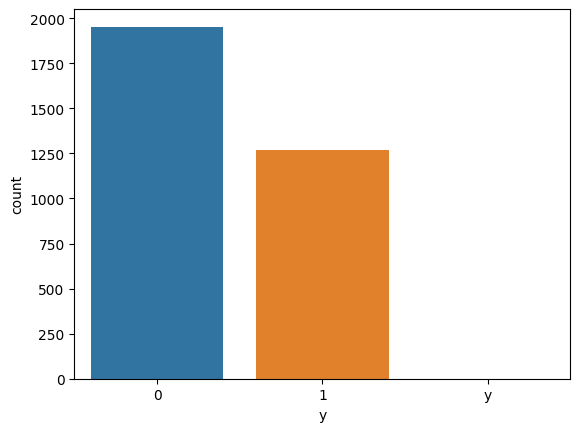

In [9]:
sns.countplot(x='y', data=trn)

## Explore Attribute Variables
Select four arbitrary features and get paired plots

In [10]:
# Check data types of the columns
print(trn.dtypes[['X5', 'X20', 'X25', 'X53']])

from sklearn.preprocessing import LabelEncoder

# Example: Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
trn['X5_encoded'] = label_encoder.fit_transform(trn['X5'])
trn['X20_encoded'] = label_encoder.fit_transform(trn['X20'])
trn['X25_encoded'] = label_encoder.fit_transform(trn['X25'])
trn['X53_encoded'] = label_encoder.fit_transform(trn['X53'])



X5     object
X20    object
X25    object
X53    object
dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The palette list has

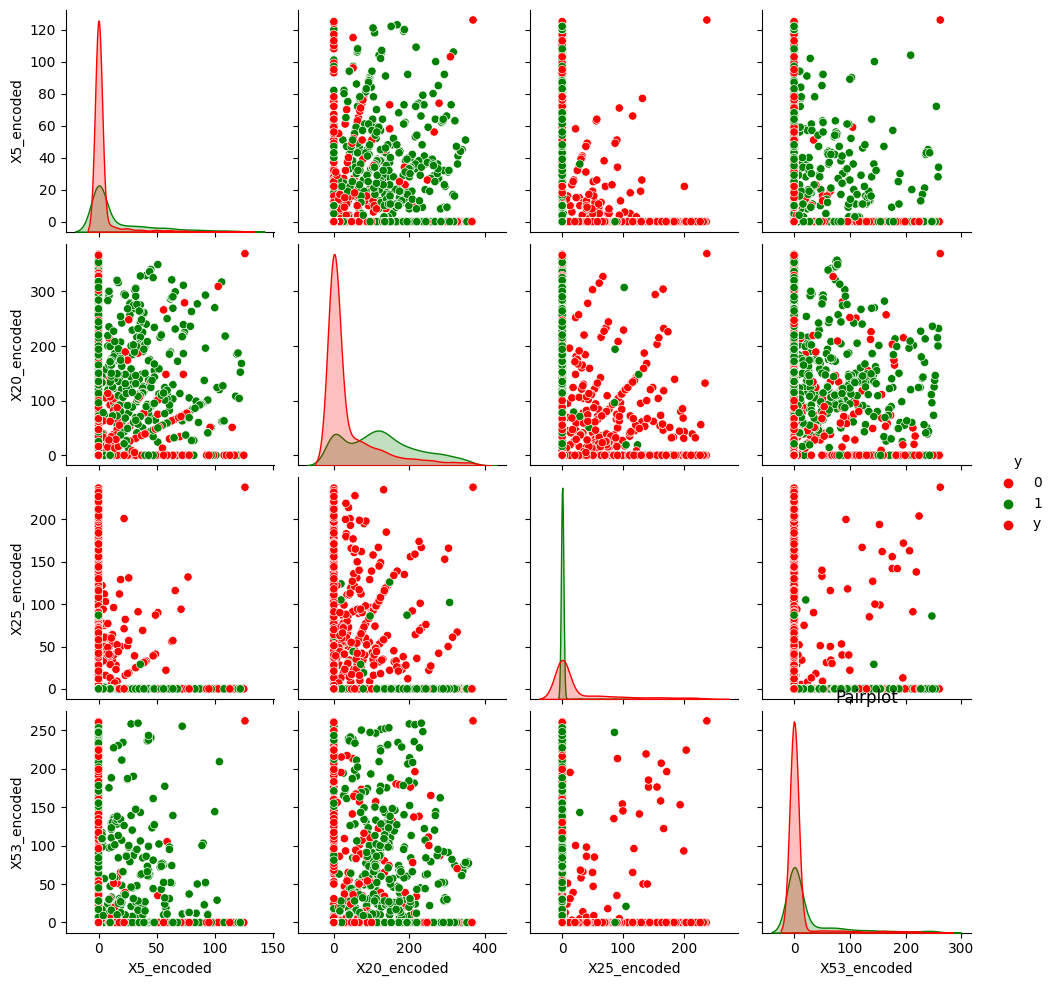

In [11]:
# Create a pairplot to show pairwise relationships
sns.pairplot(trn, hue='y', palette=['red', 'green'])
plt.title('Pairplot')
plt.show()

In [16]:
# Imports the training data
trn = pd.read_csv('/content/spambase.csv')

# Separates the attributes X0-X56 into X_trn
X_trn = trn.filter(regex='\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('/content/spambase.csv')

# Separates the attributes X0-X56 into X_tst
X_tst = tst.filter(regex='\d')

# Separates the class variable into y_tst
y_tst = tst.y

# Class labels
spam = ['Not Spam','Spam']

# kNN: TRAIN MODEL
To train a kNN model, set up a `KNeighborsClassifier` object and fit it to training data.

In [20]:
# Sets up a kNN model and fits it to data
knn = KNeighborsClassifier(n_neighbors=5) \
    .fit(X_trn, y_trn)



In [21]:
print(
    'Accuracy on training data: '
    + str("{:.2%}".format(knn.score(X_trn, y_trn))))

Accuracy on training data: 87.24%


## Optimize the kNN Model

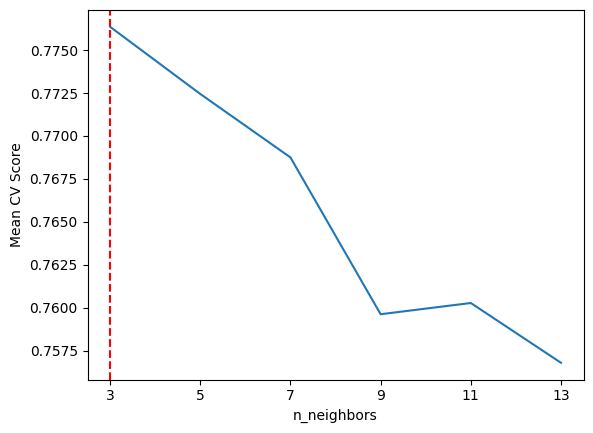

In [23]:
# Sets up the kNN classifier object
knn = KNeighborsClassifier()

# Search parameters
param = range(3, 15, 2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Fits the grid object and gets the best model
best_knn = grid \
    .fit(X_trn,y_trn) \
    .best_estimator_

# Displays the optimum model
best_knn.get_params()


# Plots mean_test_scores vs. total neighbors
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

# Draws a vertical line where the best model is
plt.axvline(
    x=best_knn.n_neighbors,
    color='red',
    ls='--')

# TESTING OUR KNN MODEL


In [27]:
y_pred = best_knn.predict(X_tst)
cm = confusion_matrix(y_tst, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

#ACCURACY ON TESTING DATA
print(
    'Accuracy on testing data: '
    + str("{:.2%}".format(best_knn.score(X_tst, y_tst))))


Confusion Matrix:
[[2576  212]
 [ 233 1580]]
Accuracy on testing data: 90.33%


# NAIVE BAYES: TRAIN MODEL
The code below creates a `GaussianNB` object to classify spam vs. not spam using the naive Bayes algorithm.

In [30]:
nb = GaussianNB() \
    .fit(X_trn, y_trn)

In [31]:
print(
    'Accuracy on training data: '
    + str("{:.2%}".format(nb.score(X_trn, y_trn))))

Accuracy on training data: 82.29%


In [33]:
# Assuming best_knn is your trained model, X_tst is your test data, and y_tst is the true labels
y_pred = nb.predict(X_tst)
cm = confusion_matrix(y_tst, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2047  741]
 [  74 1739]]


In [32]:
print(
    'Accuracy on testing data: '
    + str("{:.2%}".format(nb.score(X_tst, y_tst))))

Accuracy on testing data: 82.29%


#OPTIMIZATION NAIVE BAYES ALGORITHM

In [34]:
# Define the hyperparameters to tune and their values
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Example values for var_smoothing
}

# Perform GridSearchCV
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trn, y_trn)

# Display the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Display the best accuracy score
print("Best accuracy:", grid_search.best_score_)

Best hyperparameters: {'var_smoothing': 1e-06}
Best accuracy: 0.8300304489449086


In [37]:
best_params = grid_search.best_params_
tuned_naive_bayes = GaussianNB(var_smoothing=best_params['var_smoothing'])

# Fit the model on the entire training data
tuned_naive_bayes.fit(X_trn, y_trn)

# Evaluate the model on the testing dataset
accuracy_on_test = tuned_naive_bayes.score(X_tst, y_tst)
print("Accuracy on testing dataset:", "{:.2%}".format(accuracy_on_test))

Accuracy on testing dataset: 85.33%


# DECISION TREE: TRAIN MODEL

## Fit the Training Data
A simple method for a decision tree is to create a `DecisionTreeClassifier` object and fit it to the training data. The object has a method `score()` that returns the accuracy of the model on the given data. The `DecisionTreeClassifier` requires two parameters:

- `criterion`: Can be `entropy` or `gini`
- `max_leaf_nodes`: Specifies the size of the tree by explicitly stating the total leaf nodes

In [46]:
# Creates a DecisionTreeClassifier object
dt = DecisionTreeClassifier(
    criterion='entropy',
    random_state=0,
    max_leaf_nodes=7)


In [47]:
# Fits the decision tree to training data
dt.fit(X_trn,y_trn)

print(
    'Accuracy on training data: '
    + str("{:.2%}".format(dt.score(X_trn, y_trn))))

Accuracy on training data: 89.76%


## Optimize the Decision Tree
The `GridSearchCV` object can be used to find the optimal decision tree. This object can be set up by specifying a range of values for `max_leaf_nodes` and the two possible values of `criterion`. In the code below `GridSearchCV` is set up with the default 5 fold cross validation.

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 26, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


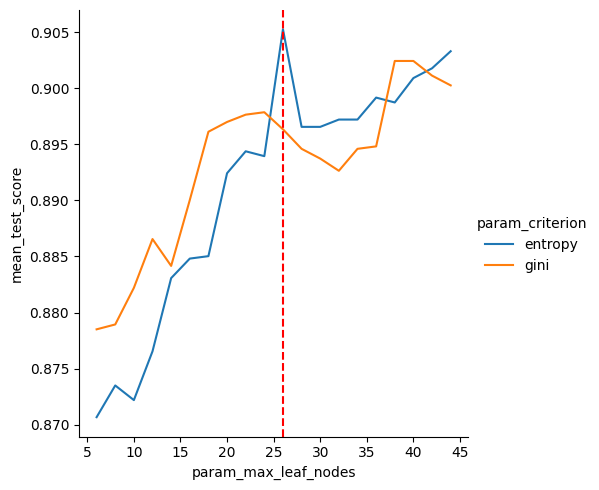

In [48]:
# Defines a DecisionTreeClassifier object
dt = DecisionTreeClassifier(
    random_state=1)

# Possible values for max_leaf_nodes to try
param = range(6,45,2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    dt,
    {'max_leaf_nodes': param,
     'criterion': ['entropy','gini']})

# Fits the grid to the training data
grid.fit(X_trn,y_trn)

# Stores the optimum model in best_dt
best_dt = grid.best_estimator_

# Displays the optimum model
print(best_dt.get_params())


# Plots the mean accuracy against max_leaf_nodes
sns.relplot(
    data=pd.DataFrame.from_dict(grid.cv_results_, orient='columns'),
    kind='line',
    x='param_max_leaf_nodes',
    y='mean_test_score',
    hue='param_criterion'
)

# Draws a vertical red line, where the best model is
plt.axvline(
    x=best_dt.max_leaf_nodes,
    color='red',
    ls='--')

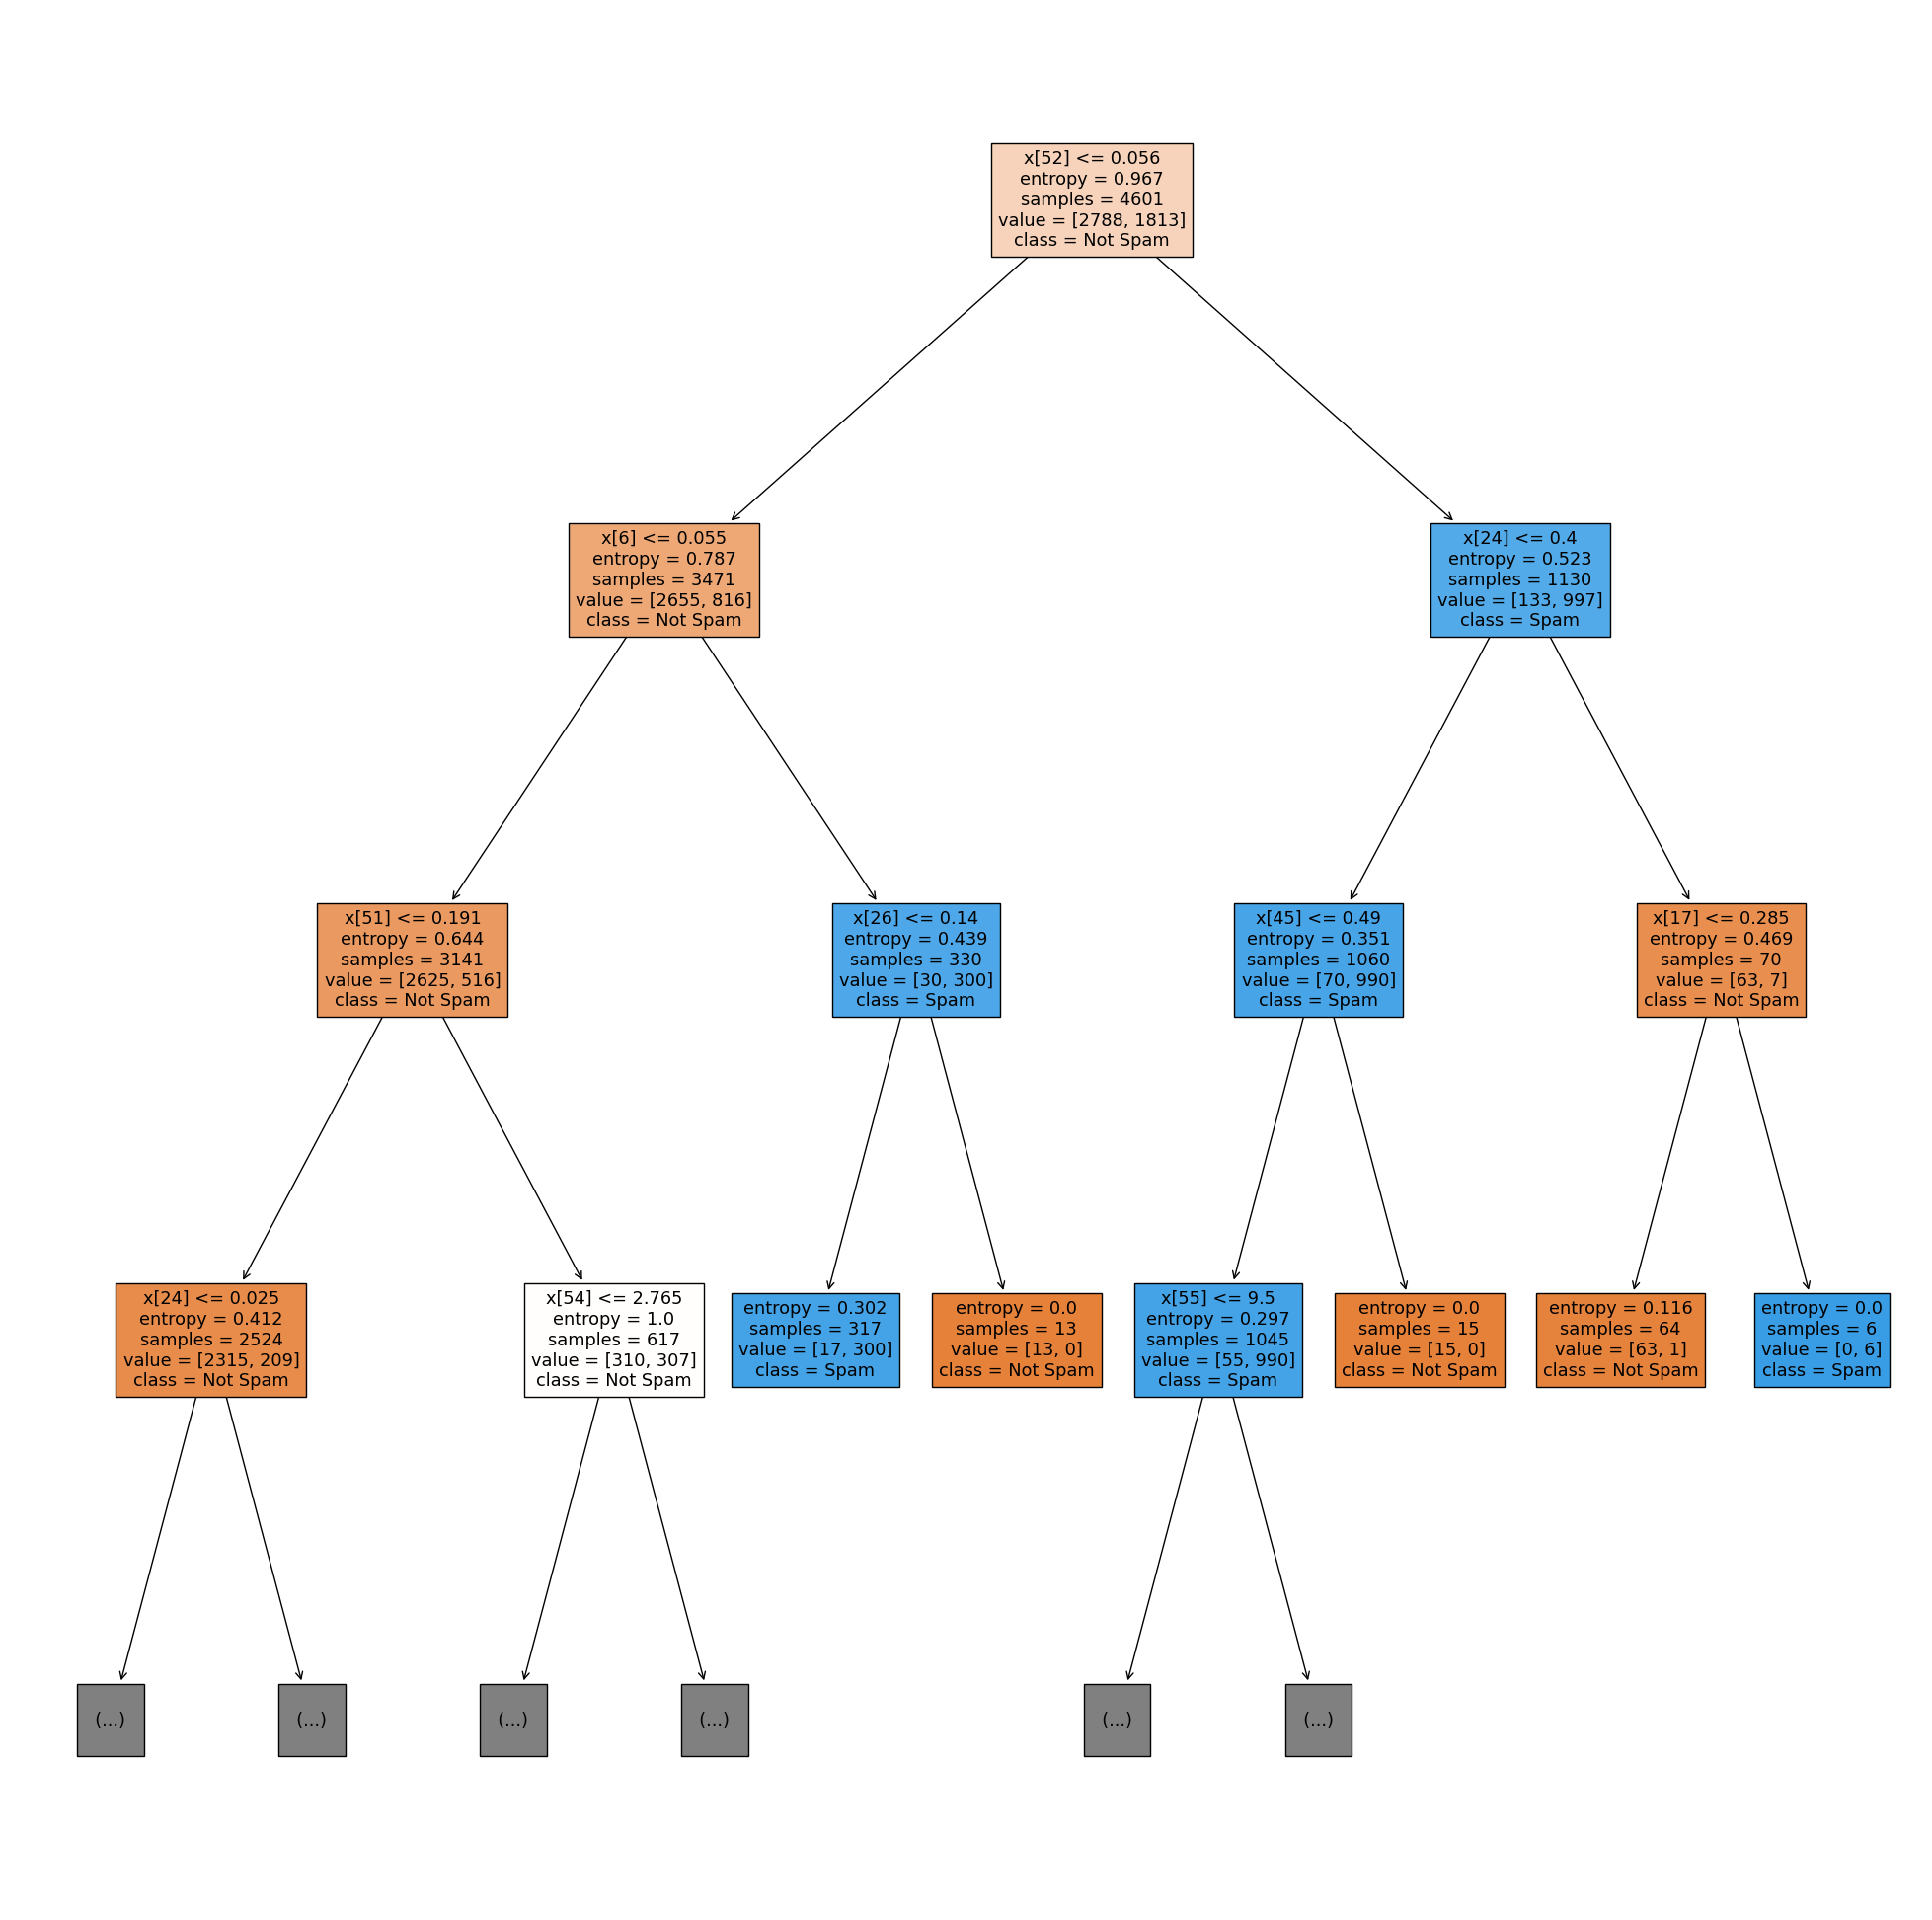

In [49]:
# Sets the figure size
fig = plt.figure(figsize=(25, 25))

# Creates a visual display of the model.
# Keep max_depth small for better visualization
t = plot_tree(
    best_dt,
    class_names=spam,
    max_depth=3,
    filled=True)

# TEST MODEL
Display the confusion matrix for the test data `tst` using the optimum decision tree model, `best_dt`, found in the training phase. A good evaluation measure is the `confusion matrix` that gives the fraction of true positives, true negatives, false positives, and false negatives.

In [52]:
print(
    'Accuracy on testing data: '
    + str("{:.2%}".format(best_dt.score(X_tst, y_tst))))


Accuracy on testing data: 92.70%
